In [1]:
import numpy as np
import sympy as sp
import shared_functions as sf
from IPython.display import HTML
import matplotlib.pyplot as plt
import ipywidgets as widgets

IN the last notebooks we introduced the idea of a derivatie and integral. Note that we have done so following Falhaber, the appearance of a pattern and the sugesttion that this structure matters, in the same way as we introduced, the determinant is useful structure that appears often. 

Introudcing this algebraically has allowed us to sidestep usual complexity. But at teh same timeLet's turn back to now to understand what a curve is. And defininng a curve is actually very difficult. We have dealt with it to and extent with polygonal splines, and, approxmiation, 

In this notebook we will look back to provide some context around algebraically presenting these curves frmo antiquity and also especially in context. There is a lovely chapter on conics in the Precalculus text and this weill allow us to make contact with this

Let's start by understanding a definition of circle. 

<div style="background:gray; color:white; padding: 10px">

<h4>Formal Definition 4.4.3</h4>
<i>Proposition:</i><br/> A circle is determined by a a point $C = [r, s]$, $x$ and $y$ called the centre and a number $K$ called the quadrance and can be defined as: 
    
$$  (x-r)^2+(y-s)^2=K  $$
    
or equivalently
    
$$ x^2+y^2-2rx-2sy+r^2+s^2-K=0. $$
    
The variable point $X=[x,y] $ is incident with $c$ pricely when 
    
$$  Q(X,C)=K. $$


    


<br/><i>Related name:</i><br/> Algebraic definition of a circle
<br/><i>Ref. 1:</i> The defining properties of the quadratic equation are that there is no xy term, and that the coefficients of the x^2 and y^2 terms are equal and non-zero.


</div>

Note of course, there is nothing visual about this definition. We have already established an algebraic way of working, and we could choose whichever combinations of algebraic we migth imagine that would be consistent. Here we are elevating this combination, and giving it some names.  and it is possible to create sybmbols and use operations in the above way. Set of constraints. 

Let's start by just checking the above expansion: 

In [52]:
x, y, r, s, K = sp.symbols('x, y, r, s, K')
e1 = sp.Eq(((x - r)**2 + (y - s)**2 ), K)
e1

Eq((-r + x)**2 + (-s + y)**2, K)

In [4]:
e1.expand()

Eq(r**2 - 2*r*x + s**2 - 2*s*y + x**2 + y**2, K)

So this all works with Python. Now let's create a function to take values for the variables and return an equation: 

In [5]:
def create_equation_of_circle(x, y, r, s, K):
    return(sp.Eq((x - r)^2 + (y - s)^2, K))
    #return(sp.Eq(x**2 + y **2 - 2 * r * x - 2 * s * y + r**2 + s**2 - K, 0))


We will provide some values, and we get an equation back. 

In [6]:
e2 = create_equation_of_circle(x, y, r, s, K)
e2

Eq((-r + x)**2 + (-s + y)**2, K)

Or we can try with some numbers

In [7]:
e3 = create_equation_of_circle(x, y, 4, 2, 25)
e3

Eq((x - 4)**2 + (y - 2)**2, 25)

While there is nothing visual about this, it would also be nice to verfiy that this has some kind of visual analoge. This is a little different to he paramaterisation we saw and involves some square roots which can make it a little complexet's solve this in Python. 

To do this I am going to create a small helper function to let me do some step by step manipulation of an equation, and just have a lot more control. It's rare that you would want to do this, but it seems handy: 

In [8]:
def step_manipulate_equation(lhs, rhs, operation, expression = ""):
    if operation == "add":
        return sp.Eq(lhs + expression, rhs + expression)
    elif operation == "sub":
        return sp.Eq(lhs - expression, rhs - expression)
    elif operation == "sqrt":
        return sp.Eq(sp.sqrt(lhs), sp.sqrt(rhs))
    elif operation == "remove_abs":
        lhs_abs_removed = lhs.args[0]
        return([sp.Eq(lhs_abs_removed, rhs),sp.Eq(lhs_abs_removed, -rhs) ])

Let's set up the equation again. Note also that I am going to put a condition on y when I create it, just so I can manipulate things: 

In [9]:
x, r, s, K = sp.symbols('x, r, s, K')
y = sp.symbols('y', positive = True)
e3 = create_equation_of_circle(x, y, 4, 2, 25)
e3

Eq((x - 4)**2 + (y - 2)**2, 25)

Get y on on one side:

In [10]:
e4 = step_manipulate_equation(e3.lhs, e3.rhs, "sub", (x - 4)**2)
e4

Eq((y - 2)**2, 25 - (x - 4)**2)

Now square root both sides: 

In [11]:
e5 = step_manipulate_equation(e4.lhs, e4.rhs, "sqrt")
e5

Eq(Abs(y - 2), sqrt(25 - (x - 4)**2))

Now remove that absolute value. Note when we do this we get two equations: 

In [12]:
e6 = step_manipulate_equation(e5.lhs, e5.rhs, "remove_abs")
e6[0]

Eq(y - 2, sqrt(25 - (x - 4)**2))

In [13]:
e6[1]

Eq(y - 2, -sqrt(25 - (x - 4)**2))

And solve for y, again leaving us with two equations: 

In [14]:
e7 = step_manipulate_equation(e6[0].lhs, e6[0].rhs, 'add', 2)
e7

Eq(y, sqrt(25 - (x - 4)**2) + 2)

In [15]:
e8 = step_manipulate_equation(e6[1].lhs, e6[1].rhs, 'add', 2)
e8

Eq(y, 2 - sqrt(25 - (x - 4)**2))

Finally, let's plot some values. Notice the domain here. I choose values below  -2 or above 10, otherwise would get negative square root and if I am not working with real numbers, we can't resolve. We are not dealing with complex numbers as yet. Even the radical itself provides 

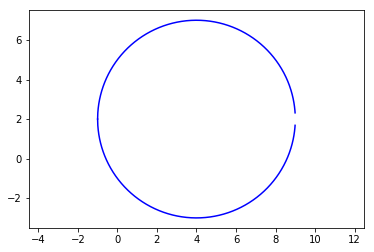

In [85]:
x_values = np.arange(-1, 9, 0.01)
y1 = [e7.rhs.subs(x, x_values[i]) for i in range(len(x_values))]
y2 = [e8.rhs.subs(x, x_values[i]) for i in range(len(x_values))]

fig, ax = plt.subplots()
ax.axis('equal')
ax.plot(x_values, y1, 'b')
ax.plot(x_values, y2, 'b')

So I certainly get something that looks like a circle. But it also challenges, should we really call this thing a circle? I am never going to get those final points. A constrained set of points this equation that I call a circle is not some infinite set of points, rather that it is really constrained and it's important to keep this in mind

Its worth noting that in many cases, these equation won't look like this form but can be dealth with, so for example  $x^2+y^2-6x+2y-3=0$, we can complete the square and solve to $(x-3)^2+(y+1)^2=13$

IN gneral, if we allow for the fact that  quadratic equation are that there is no xy term, and that the coefficients of the x2 and y2 terms are equal and non-zero.

Note that if If we have a quadratic equation with no xy term, and with the coefficients of the x2 and y2 terms equal and non-zero, then after dividing by that common coefficient, it has the form

$$ x^2+y^2-2rx-2sy+m=0 $$


for some numbers r,s and m. Then we complete the square to rewrite this as

$$(x-r)^2+(y-s)^2+m-r^2-s^2=0 $$

which by the identity we have created, is a circle with centre $[r,s]$ and quadrance $K=r^2+s^2-m$

<div style="background:#99ddff; color:black; padding: 10px">
<b>Add to these notes:</b>

Completing the squares is a simple operation and one that comes up up alot. But what if we wanted to implement this in python Sympy. Its actually a little difficult, we could of course break up more any thing to one side, then break up. 
    
</div>

Let's look at an interesting  example to consider is the following 
 $$ x^2+y^2+4x+1=0 $$
 
We can follow the standard strategy to complete the squares in order to get it itnot form here of course, and get 
$$  (x+2)^2+y^2=3 $$

When we do so, we will get a circle with a centre of $C = [-2,0]$ and a quadrance of 3, or radius as $\sqrt{3}$. 

Let's considder this in context of Fermat's theorom on sums o2 squares which states that an odd prime, $p$ can be extpressed as 

$$ p = n^2 + m^2 $$ with m, n integers precicely when $p\equiv 1 \pmod {4}$

Note also that if an integer is the sum of two rational squares then it is a sum of two integer squares. So if it is not a sum of two integer squares, then it is not the sum of two rational squares.Since $3\not\equiv 1 \pmod {4}$ , it follows that there are no rational numbers r and s satisfying $r^2+s^2=3$. 

Thus this circle also has no points lying on it. The appearance of a circle, and point joins two lines, but the circle is not a proper structure.  

Let's just include a furhter proof before the we move to consider a conic
 
 
 

<div style="background:gray; color:white; padding: 10px">

<h4>Proof 5.1.3</h4>
<i>Proposition:</i><br/> The centre and quadrance of a circle are unique.


<br/><b>Step x:</b> Let $x, y, r, s, r_1, s_1, K$ and $K_1$ be integers 
<br/><b>Step x:</b> Let $c$ be a circle denoted as
$$ c:\, (x-r)^2+(y-s)^2=K $$
<br/><b>Step x:</b> Let $c_1$ be a circle denoted as
$$c_1:\, (x-r_1)^2+(y-s_1)^2=K_1$$
<br/><b>Step x:</b> Manipulate by subtracting $c_1$ from $c$
$$2(r_1-r)x+r^2-r_1^2+2(s_1-s)y+s^2-s_1^2=K-K_1.$$
<br/><b>Step x:</b> From this identity of polynomials, we conclude that $r_1=r$, $s_1=s$, and that $K_1=K$.
    
   

    


    


<br/><i>Related name:</i><br/> Algebraic definition of a circle
<br/><i>Ref. 1:</i> The defining properties of the quadratic equation are that there is no xy term, and that the coefficients of the x^2 and y^2 terms are equal and non-zero.


</div>

<h4>Conic Sections</h4>

We know come to a critical part of  visual standpoint, we encounter straight lines, circles, parabola, ellipse, hyperbola and cone. it is useful in studying 3D geometry which has wide applications. Allows us to think of a foundational general approach 

pi

Text(0.5,0,'z label')

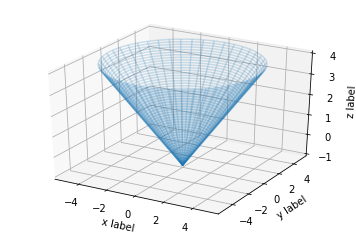

In [86]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib import patches
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

theta = np.linspace(0,2*np.pi,90)
r = np.linspace(0,5,50)
T, R = np.meshgrid(theta, r)

X = R * np.cos(T)
Y = R * np.sin(T)
Z = np.sqrt(X**2 + Y**2) - 1


ax.plot_wireframe(X, Y, Z, alpha = 0.2)
ax.set_xlabel("x label")
ax.set_ylabel("y label")
ax.set_zlabel("z label")
